# Reconnaissance du locuteur (Chirac/Mitterrand)
### SOYKOK Aylin 28711545 - CELIK Simay 28713301
## Machine Learning 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re
import os.path
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from utils_donnee import *
from evaluation import *
import pandas as pd

# Chargement des données
fname = "./datasets/AFDpresidentutf8/corpus.tache1.learn.utf8"
alltxts,alllabs = load_pres(fname)

### Durée de classification selon la taille de vocabulaire et le classifieur

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
print(len(vocabulary))
max_features_list = [100,1000,3000,4000,5000,10000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor= lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_result = [0,0,0,0]
best_max = 0
resultats = []
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = comparaison_evaluation_single(preprocessor,vectorizer,vect_params,model_params_LR,eval_func=eval_crossval,result_type='lr',timer=True)
    best_res = list(np.array(res).max(axis=0))
    resultats.append(res)
    if accuracy_difference(best_res,best_result)[1] > 0.5:
        best_result = best_res
        best_max = max_features
print("Meilleur max_features",best_max)

28524
Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Durée d'exécution : 2.895005464553833
Acc	F1	ROC-AUC	AP:
0.8757 	0.2051 	0.7557 	0.7638
_____________________________________________

 MultinomialNB 
Résultats
Durée d'exécution : 1.9390158653259277
Acc	F1	ROC-AUC	AP:
0.8692 	0.0042 	0.7406 	0.7715
______________________________________________________
Taux d'accuracy de LinReg contre Multinom : 0.75
Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Durée d'exécution : 5.020840167999268
Acc	F1	ROC-AUC	AP:
0.8897 	0.4409 	0.8405 	0.7356
_____________________________________________

 MultinomialNB 
Résultats
Durée d'exécution : 2.013047695159912
Acc	F1	ROC-AUC	AP:
0.8723 	0.0646 	0.8307 	0.7404
______________________________________________________
Taux d'accuracy de LinReg contre Multinom : 0.75
Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Durée d'exécution : 5.827527046203613
Acc	F1	ROC-AUC	AP:
0.8928 	0.5246 	0.8569 	0.7298
_____________

In [ ]:
classifiers = ['Logistic Regression','Multinomial NB']
accuracy_tuples = ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']
columns = pd.MultiIndex.from_product([classifiers, accuracy_tuples])
df = pd.DataFrame(columns=columns)
for i, sublist in enumerate(resultats):
    for j, tup in enumerate(sublist):
        for k, acc in enumerate(tup):
            df.loc[max_features_list[i], (classifiers[j], accuracy_tuples[k])] = acc

#df.index = max_features_list
df

Logistic Regression                                   Multinomial NB  \
                 Accuracy        F1   ROC AUC Avg Precision       Accuracy   
100              0.875655    0.2051  0.755676      0.763793       0.869211   
1000             0.889677  0.440855  0.840477      0.735564       0.872294   
3000             0.892829  0.524608  0.856889      0.729783         0.8794   
5000             0.885705  0.521162  0.851031      0.731472       0.880062   
10000            0.879539  0.516431  0.844314       0.73365       0.877763   
28524            0.884469  0.509212    0.8479      0.732793       0.870064   

                                         
             F1   ROC AUC Avg Precision  
100    0.004243  0.740604      0.771484  
1000   0.064557  0.830695      0.740415  
3000   0.167388  0.861017      0.729247  
5000   0.173746  0.860502      0.729354  
10000  0.142892   0.84945      0.733554  
28524  0.030161  0.804667      0.754063

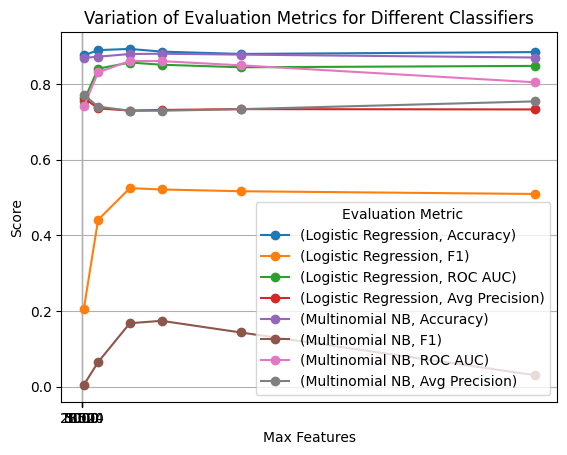

In [ ]:
# Plot the DataFrame
df.plot(marker='o')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Evaluation Metrics for Different Classifiers')
plt.xticks(range(len(df.index)), df.index)
plt.legend(title='Evaluation Metric')
plt.grid(True)
plt.show()

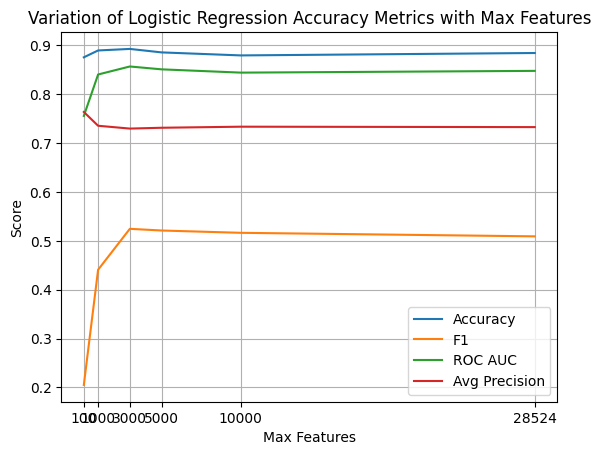

In [ ]:
logistic_regression_data = df['Logistic Regression']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(logistic_regression_data.index, logistic_regression_data[metric], label=metric)
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Logistic Regression Accuracy Metrics with Max Features')
plt.xticks(logistic_regression_data.index)
plt.legend()
plt.grid(True)
plt.show()

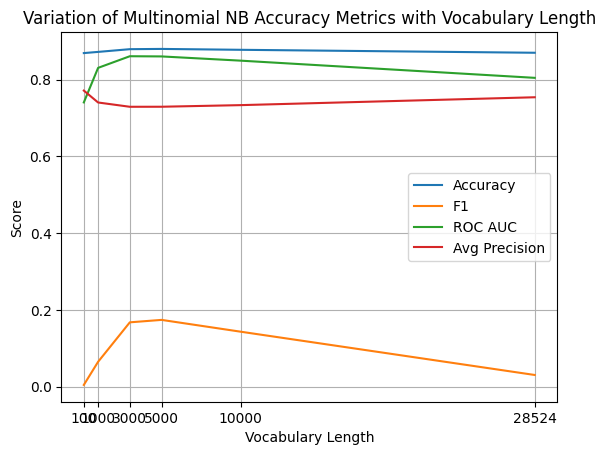

In [ ]:
multinomial_data = df['Multinomial NB']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(multinomial_data.index, multinomial_data[metric], label=metric)
plt.xlabel('Vocabulary Length')
plt.ylabel('Score')
plt.title('Variation of Multinomial NB Accuracy Metrics with Vocabulary Length')
plt.xticks(multinomial_data.index)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
durations = [
    [2.895005464553833, 1.9390158653259277],
    [5.020840167999268, 2.013047695159912],
    [5.827527046203613, 1.915006399154663],
    [5.411104679107666, 2.0440001487731934],
    [5.392001152038574, 1.9080007076263428],
    [7.292988538742065, 1.9361021518707275],
    [7.712435722351074, 1.968534231185913]
]
columns = ['Logistic Regression', 'MultinomialNB'] 

df_time = pd.DataFrame(durations,columns=columns)
df_time

,Logistic Regression,MultinomialNB
0,2.895005,1.939016
1,5.020840,2.013048
2,5.827527,1.915006
3,5.411105,2.044000
4,5.392001,1.908001
5,7.292989,1.936102
6,7.712436,1.968534


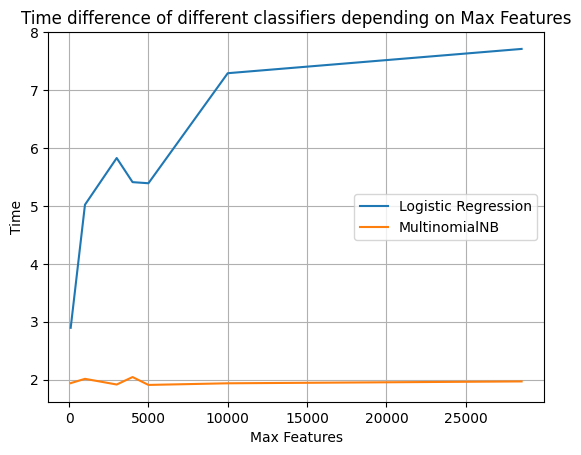

In [6]:
for i,metric in enumerate(df_time.columns):
        x_values = max_features_list
        y_values = df_time[metric]
        plt.plot(x_values, y_values, label=f'{metric}')

plt.xlabel('Max Features')
plt.ylabel('Time')
plt.title('Time difference of different classifiers depending on Max Features')
plt.legend()
plt.grid(True)
plt.show()

### Cross validation - best k

Resultats cross validation
Best k =  28
Acc	F1	ROC-AUC	AP:
0.8873 	0.9362 	0.8534 	0.9709


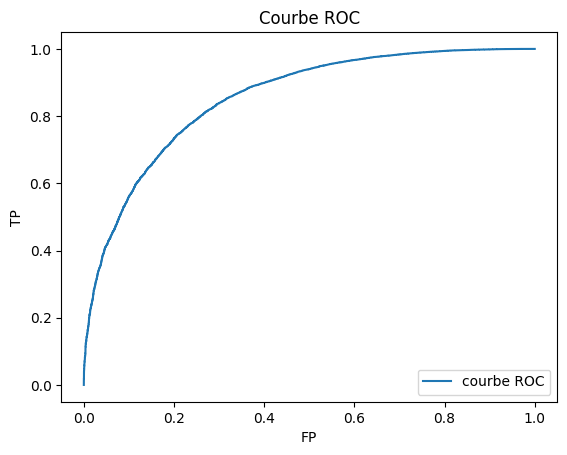

______________________


In [3]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [i for i in range(2,31,2)]

best_k,res,tous =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_LR,graphe=True,cvs=liste_k)
print("______________________")


In [4]:
k_res = pd.DataFrame(tous,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res.index = liste_k
k_res

,Acc,F1,ROC-AUC,AP
2,0.883842,0.934459,0.839105,0.967541
4,0.883946,0.934284,0.846920,0.969396
6,0.885618,0.935250,0.848045,0.969693
8,0.885078,0.934883,0.849024,0.969953
10,0.886158,0.935513,0.850847,0.970407
12,0.886646,0.935769,0.850242,0.970214
14,0.886472,0.935651,0.851414,0.970496
16,0.886594,0.935706,0.852624,0.970808
18,0.886716,0.935810,0.851550,0.970523
20,0.885827,0.935293,0.852241,0.970701


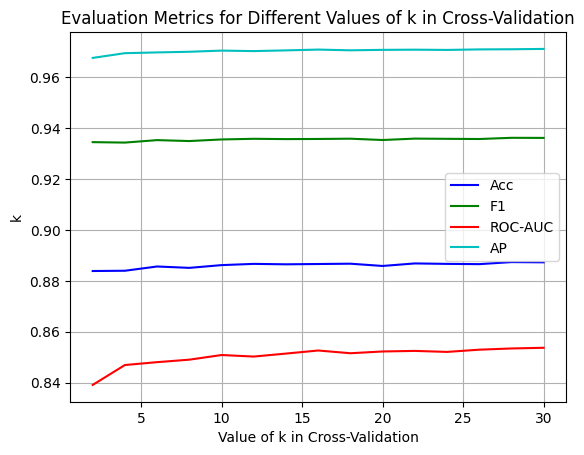

In [5]:
plot_evaluation_metrics(k_res,liste_k)

Resultats cross validation
Best k =  70
Acc	F1	ROC-AUC	AP:
0.8879 	0.5237 	0.8547 	0.7305


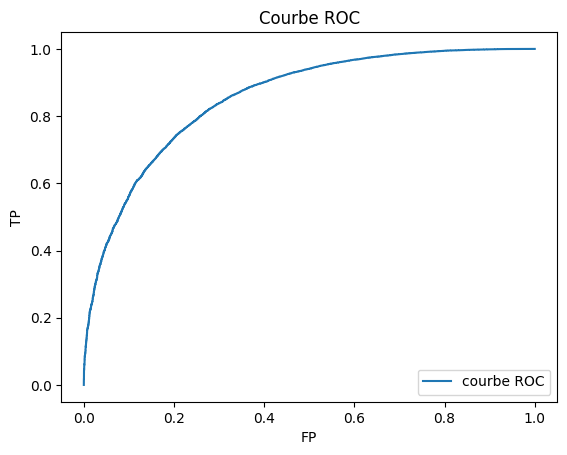

______________________


In [9]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [i for i in range(30,101,20)]

best_k,res,tous =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_LR,graphe=True,cvs=liste_k)
print("______________________")

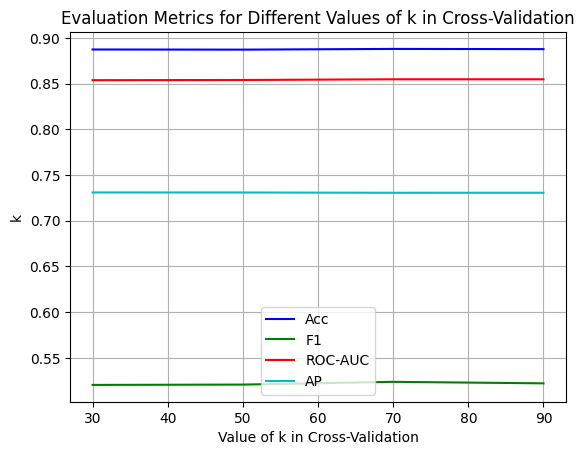

In [10]:
k_res = pd.DataFrame(tous,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res.index = liste_k
k_res
plot_evaluation_metrics(k_res,liste_k)

### stabilité de la validation croisée

In [6]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [8]
liste_res = []
for random_state in [3,10,42,120,300] :
    print(random_state)
    liste_res.append(comparaison_crossval_grain(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_SVM,graphe=True,cvs=liste_k,random_state=random_state))
print("______________________")
print(liste_res)

3
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8964 	0.4161 	0.8750 	0.7243
10
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8964 	0.4161 	0.8750 	0.7243
42
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8964 	0.4161 	0.8750 	0.7243
120
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8964 	0.4161 	0.8750 	0.7243
300
Resultats cross validation
Best k =  8
Acc	F1	ROC-AUC	AP:
0.8964 	0.4161 	0.8750 	0.7243
______________________
[(8, [0.8963997700869141, 0.4160612605537012, 0.8749585443152391, 0.724345400833437]), (8, [0.8963997700869141, 0.4160612605537012, 0.8749585443152391, 0.724345400833437]), (8, [0.8963997700869141, 0.4160612605537012, 0.8749585443152391, 0.724345400833437]), (8, [0.8963997700869141, 0.4160612605537012, 0.8749585443152391, 0.724345400833437]), (8, [0.8963997700869141, 0.4160612605537012, 0.8749585443152391, 0.724345400833437])]


In [7]:
liste_res = [lst for k,lst in liste_res]
df_stabilite = pd.DataFrame(liste_res,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
df_stabilite.index = [3,10,42,120,300]
df_stabilite

,Acc,F1,ROC-AUC,AP
3,0.8964,0.416061,0.874959,0.724345
10,0.8964,0.416061,0.874959,0.724345
42,0.8964,0.416061,0.874959,0.724345
120,0.8964,0.416061,0.874959,0.724345
300,0.8964,0.416061,0.874959,0.724345


In [8]:
df_stabilite.describe()

,Acc,F1,ROC-AUC,AP
count,5.000000e+00,5.000000,5.000000,5.000000
mean,8.963998e-01,0.416061,0.874959,0.724345
std,1.241267e-16,0.000000,0.000000,0.000000
min,8.963998e-01,0.416061,0.874959,0.724345
25%,8.963998e-01,0.416061,0.874959,0.724345
50%,8.963998e-01,0.416061,0.874959,0.724345
75%,8.963998e-01,0.416061,0.874959,0.724345
max,8.963998e-01,0.416061,0.874959,0.724345


Certainement stable